In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_feather("/home/owner/Documents/DEV/graphs/graphs_and_structural_analysis/data_source/bank_products/train.feather")
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391596,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
391597,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
391598,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
391599,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [54]:
col_names = {"ncodpers":"cust_id", "ind_empleado":"emp_index", "pais_residencia":"residence",
            "sexo":"sex","fecha_alta":"first_date","ind_nuevo":"new_cust","antiguedad":"seniority",
            "indrel":"is_primary","ult_fec_cli_1t":"last_primary_date","indrel_1mes":"cust_type",
            "tiprel_1mes":"cust_rel_type","indresi":"residence_index","indext":"foreigner_index",
            "conyuemp":"spouse_index","canal_entrada":"channel","cod_prov":"province","nomprov":"province_name",
            "ind_actividad_cliente":"active_index","renta":"income","segmento":"segment"
            }

df.rename(col_names, axis = 1, inplace = True)

In [55]:
df['sex'] = df['sex'].map({'H': 'M', 'V': 'F'})

In [56]:
df.age = pd.to_numeric(df.age, errors='coerce')
df.income = pd.to_numeric(df.income, errors='coerce')
df.seniority = pd.to_numeric(df.seniority, errors='coerce')
df.first_date = pd.to_datetime(df.first_date, errors = 'coerce')
df.cust_type = pd.to_numeric(df.cust_type, errors='coerce')
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'])

In [57]:
# For features with missing values percentage < 10%, use the most common factor level to impute
cols = ['emp_index','residence','sex','first_date','new_cust','is_primary',"cust_type","cust_rel_type",
       "province","province_name","active_index","channel","segment"]

for i in cols:
    print(df[i].value_counts())
    df.loc[df[i].isnull(), i] = df[i].value_counts().index[0]
    
# For features with missing value accounts for over 10%, impute their missing values based on the mean at different dimensions
# For Income, impute the missings using the medians of Customer Segment and Province
df['income'].fillna(df['income'].mean(), inplace = True)

N    13610977
B        3566
F        2523
A        2492
S          17
Name: emp_index, dtype: int64
ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
ZW          11
DJ          11
JM          11
BM           6
MT           2
Name: residence, Length: 118, dtype: int64
F    7424252
M    6195253
Name: sex, dtype: int64
2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
              ...  
2014-04-27       11
2015-05-31        9
2014-05-01        7
2010-07-04        4
2009-12-25        4
Name: first_date, Length: 6756, dtype: int64
0.0    12808368
1.0      811207
Name: new_cust, dtype: int64
1.0     13594782
99.0       24793
Name: is_primary, dtype: int64
1.0    13490681
3.0        4350
2.0        1317
4.0         306
Name: cust_type, dtype: int64
I    7304875
A    6187123
P       4656
R        870
N          4
Name: cust_rel_type, dtype: int64
28.0    4409600
8.0     1275219
46.0     682304
41.0     6

In [58]:
# filling dummies with NA by 0
dummies = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
          'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
          'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
          'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
          'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
          'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
          'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
          'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
          'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
          'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
          'ind_viv_fin_ult1', 'ind_nomina_ult1',
          'ind_nom_pens_ult1', 'ind_recibo_ult1']

df[dummies] = df[dummies].fillna(0)

In [59]:
# Drop the last primary date and spouse index fields given over 99% missing values
df.drop(['last_primary_date','spouse_index'], axis = 1, inplace = True)

# Инжиниринг фич

In [60]:
# 1) Age group: group the age for lifestages: young, adult, senior, elder
age_group = [0, 20, 45, 65, 100]
age_labels = ['young', 'adult', 'senior', 'elder']

df['age_grouped'] = pd.cut(df.age, bins = age_group, labels = age_labels)

In [61]:
# 2) Income Group: group the incomes at Low, Ordinary, Median-high and High classes at (real case may be more complex)
import numpy as np
df_income_group = [0, np.nanpercentile(df['income'], 25), np.nanpercentile(df['income'], 50), np.nanpercentile(df['income'], 75), np.nanpercentile(df['income'], 100)]
income_labels = ['Low','Ordinary','Median-high','High']

df['income_grouped'] = pd.cut(df['income'], df_income_group, labels = income_labels)

In [62]:
# categorical = df.columns[(df.dtypes == "object") | (df.dtypes == "category")]
# for column in categorical:
#     df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
#     df.drop(columns=column, inplace=True)

In [63]:
print("[", end="")
for column in df.columns: print(f"{column}, ", end="")
print("]")

[fecha_dato, cust_id, emp_index, residence, sex, age, first_date, new_cust, seniority, is_primary, cust_type, cust_rel_type, residence_index, foreigner_index, channel, indfall, tipodom, province, province_name, active_index, income, segment, ind_ahor_fin_ult1, ind_aval_fin_ult1, ind_cco_fin_ult1, ind_cder_fin_ult1, ind_cno_fin_ult1, ind_ctju_fin_ult1, ind_ctma_fin_ult1, ind_ctop_fin_ult1, ind_ctpp_fin_ult1, ind_deco_fin_ult1, ind_deme_fin_ult1, ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_fond_fin_ult1, ind_hip_fin_ult1, ind_plan_fin_ult1, ind_pres_fin_ult1, ind_reca_fin_ult1, ind_tjcr_fin_ult1, ind_valo_fin_ult1, ind_viv_fin_ult1, ind_nomina_ult1, ind_nom_pens_ult1, ind_recibo_ult1, age_grouped, income_grouped, ]


In [64]:
for dummy1 in dummies:
    for dummy2 in dummies:
        if dummy1 == dummy2: continue
        df[dummy2] = (~df[dummy1].astype(bool)) & df[dummy2].astype(bool)

In [65]:
df['service_name'] = pd.from_dummies(df[dummies], default_category="Unknown")

In [66]:
df['service_name'].value_counts()

ind_cco_fin_ult1     11503962
ind_cno_fin_ult1       851859
ind_ctop_fin_ult1      443799
Unknown                224806
ind_ecue_fin_ult1      174677
ind_ctju_fin_ult1      113881
ind_ctma_fin_ult1       84543
ind_dela_fin_ult1       64576
ind_reca_fin_ult1       61256
ind_recibo_ult1         27854
ind_ctpp_fin_ult1       21460
ind_tjcr_fin_ult1       20752
ind_deco_fin_ult1       13368
ind_plan_fin_ult1        9937
ind_valo_fin_ult1        6495
ind_fond_fin_ult1        5368
ind_hip_fin_ult1         4628
ind_nomina_ult1          4384
ind_pres_fin_ult1        3209
ind_viv_fin_ult1         2979
ind_ahor_fin_ult1         957
ind_deme_fin_ult1         945
ind_nom_pens_ult1         805
ind_cder_fin_ult1         703
ind_aval_fin_ult1         106
Name: service_name, dtype: int64

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['service_id'] = le.fit_transform(df['service_name'])

# Постобработка

In [68]:
products_by_age_groups = df.groupby('age_grouped')['service_name'].value_counts()
products_by_age_groups = products_by_age_groups.groupby(level=0).head(5).unstack().fillna(0).sort_index(axis=1)

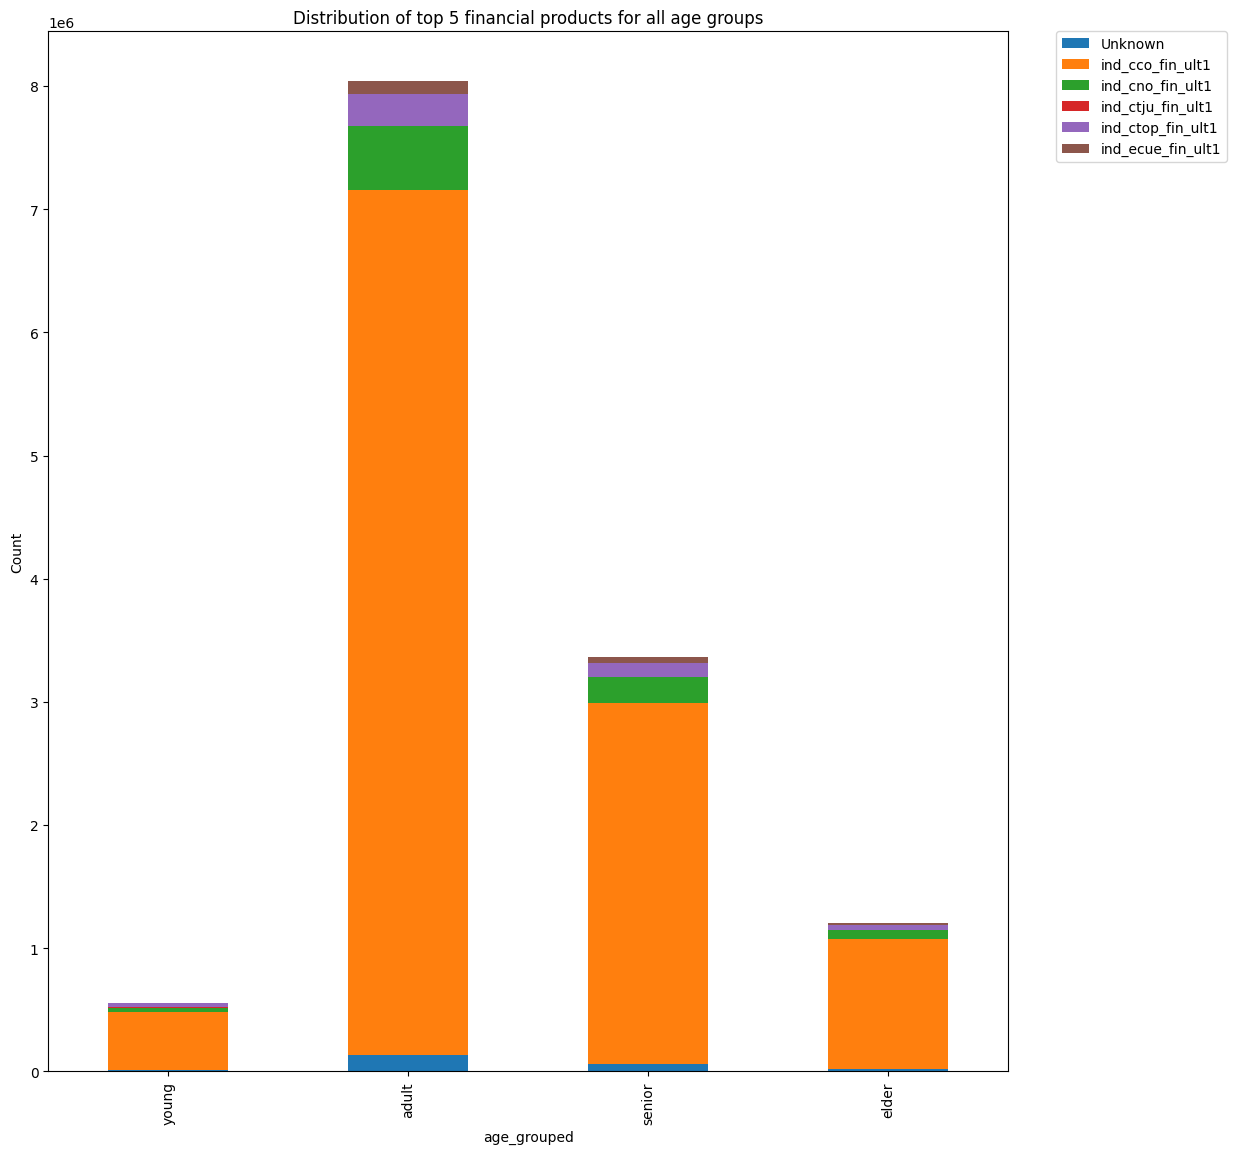

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))
products_by_age_groups.plot(kind='bar', stacked=True, ax=ax)

plt.title('Distribution of top 5 financial products for all age groups')
plt.ylabel('Count')

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=1.5, wspace=0.4, hspace=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [70]:
products_by_sex = df.groupby('sex')['service_name'].value_counts()
products_by_sex = products_by_sex.groupby(level=0).head(5).unstack().fillna(0).sort_index(axis=1)

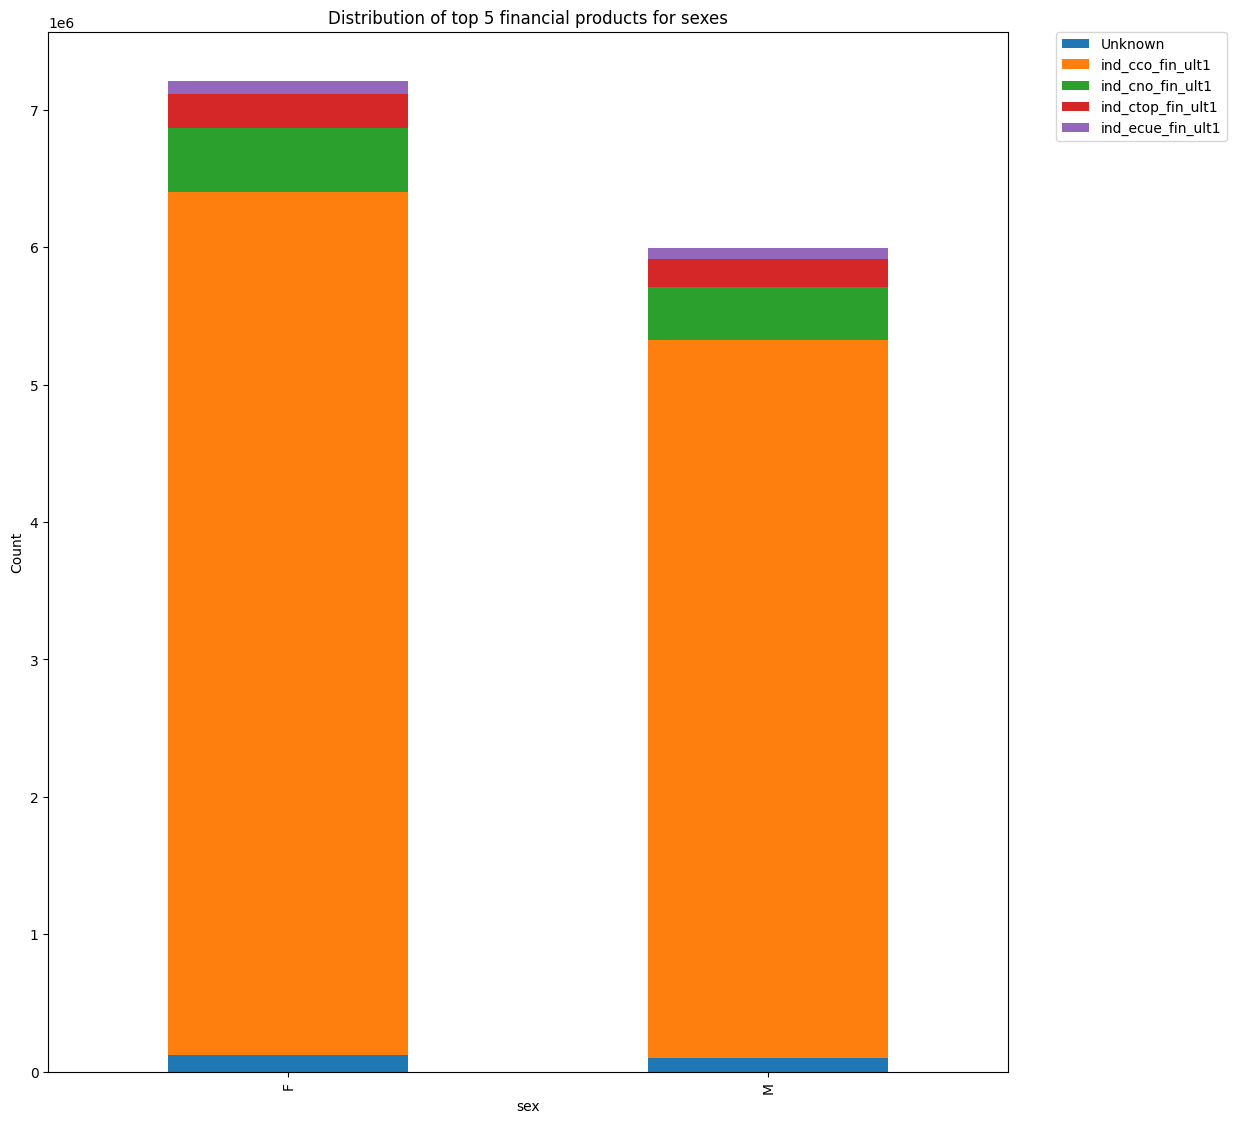

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
products_by_sex.plot(kind='bar', stacked=True, ax=ax)

plt.title('Distribution of top 5 financial products for sexes')
plt.ylabel('Count')

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=1.5, wspace=0.4, hspace=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [72]:
df.columns

Index(['fecha_dato', 'cust_id', 'emp_index', 'residence', 'sex', 'age',
       'first_date', 'new_cust', 'seniority', 'is_primary', 'cust_type',
       'cust_rel_type', 'residence_index', 'foreigner_index', 'channel',
       'indfall', 'tipodom', 'province', 'province_name', 'active_index',
       'income', 'segment', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'age_grouped', 'income_grouped', 'service_name',
       'service_id'],
      dtype='object')

In [73]:
data = df[['cust_id', 'service_name', 'service_id']].rename({'cust_id': 'customer_id'}, axis = 1)

In [74]:
data = data.sample(len(data) // 100)
data

,customer_id,service_name,service_id
337172,613019,ind_cco_fin_ult1,3
20061,1147012,ind_cco_fin_ult1,3
166938,493703,ind_cco_fin_ult1,3
58781,1031379,ind_cco_fin_ult1,3
150745,1257498,ind_cno_fin_ult1,5
...,...,...,...
324811,943724,ind_ctop_fin_ult1,8
382804,1088332,ind_cco_fin_ult1,3
359754,302645,ind_cco_fin_ult1,3
260321,1191150,ind_cno_fin_ult1,5


In [75]:
import networkx as nx
G = nx.Graph()

In [76]:
user_nodes = data['customer_id'].unique()
item_nodes = data['service_id'].unique()
G.add_nodes_from(user_nodes, bipartite=0)
G.add_nodes_from(item_nodes, bipartite=1)
for user, item in zip(data['customer_id'], data['service_id']):
    G.add_edge(user, item, weight=1)

nx.write_gexf(G, 'graph.gexf')

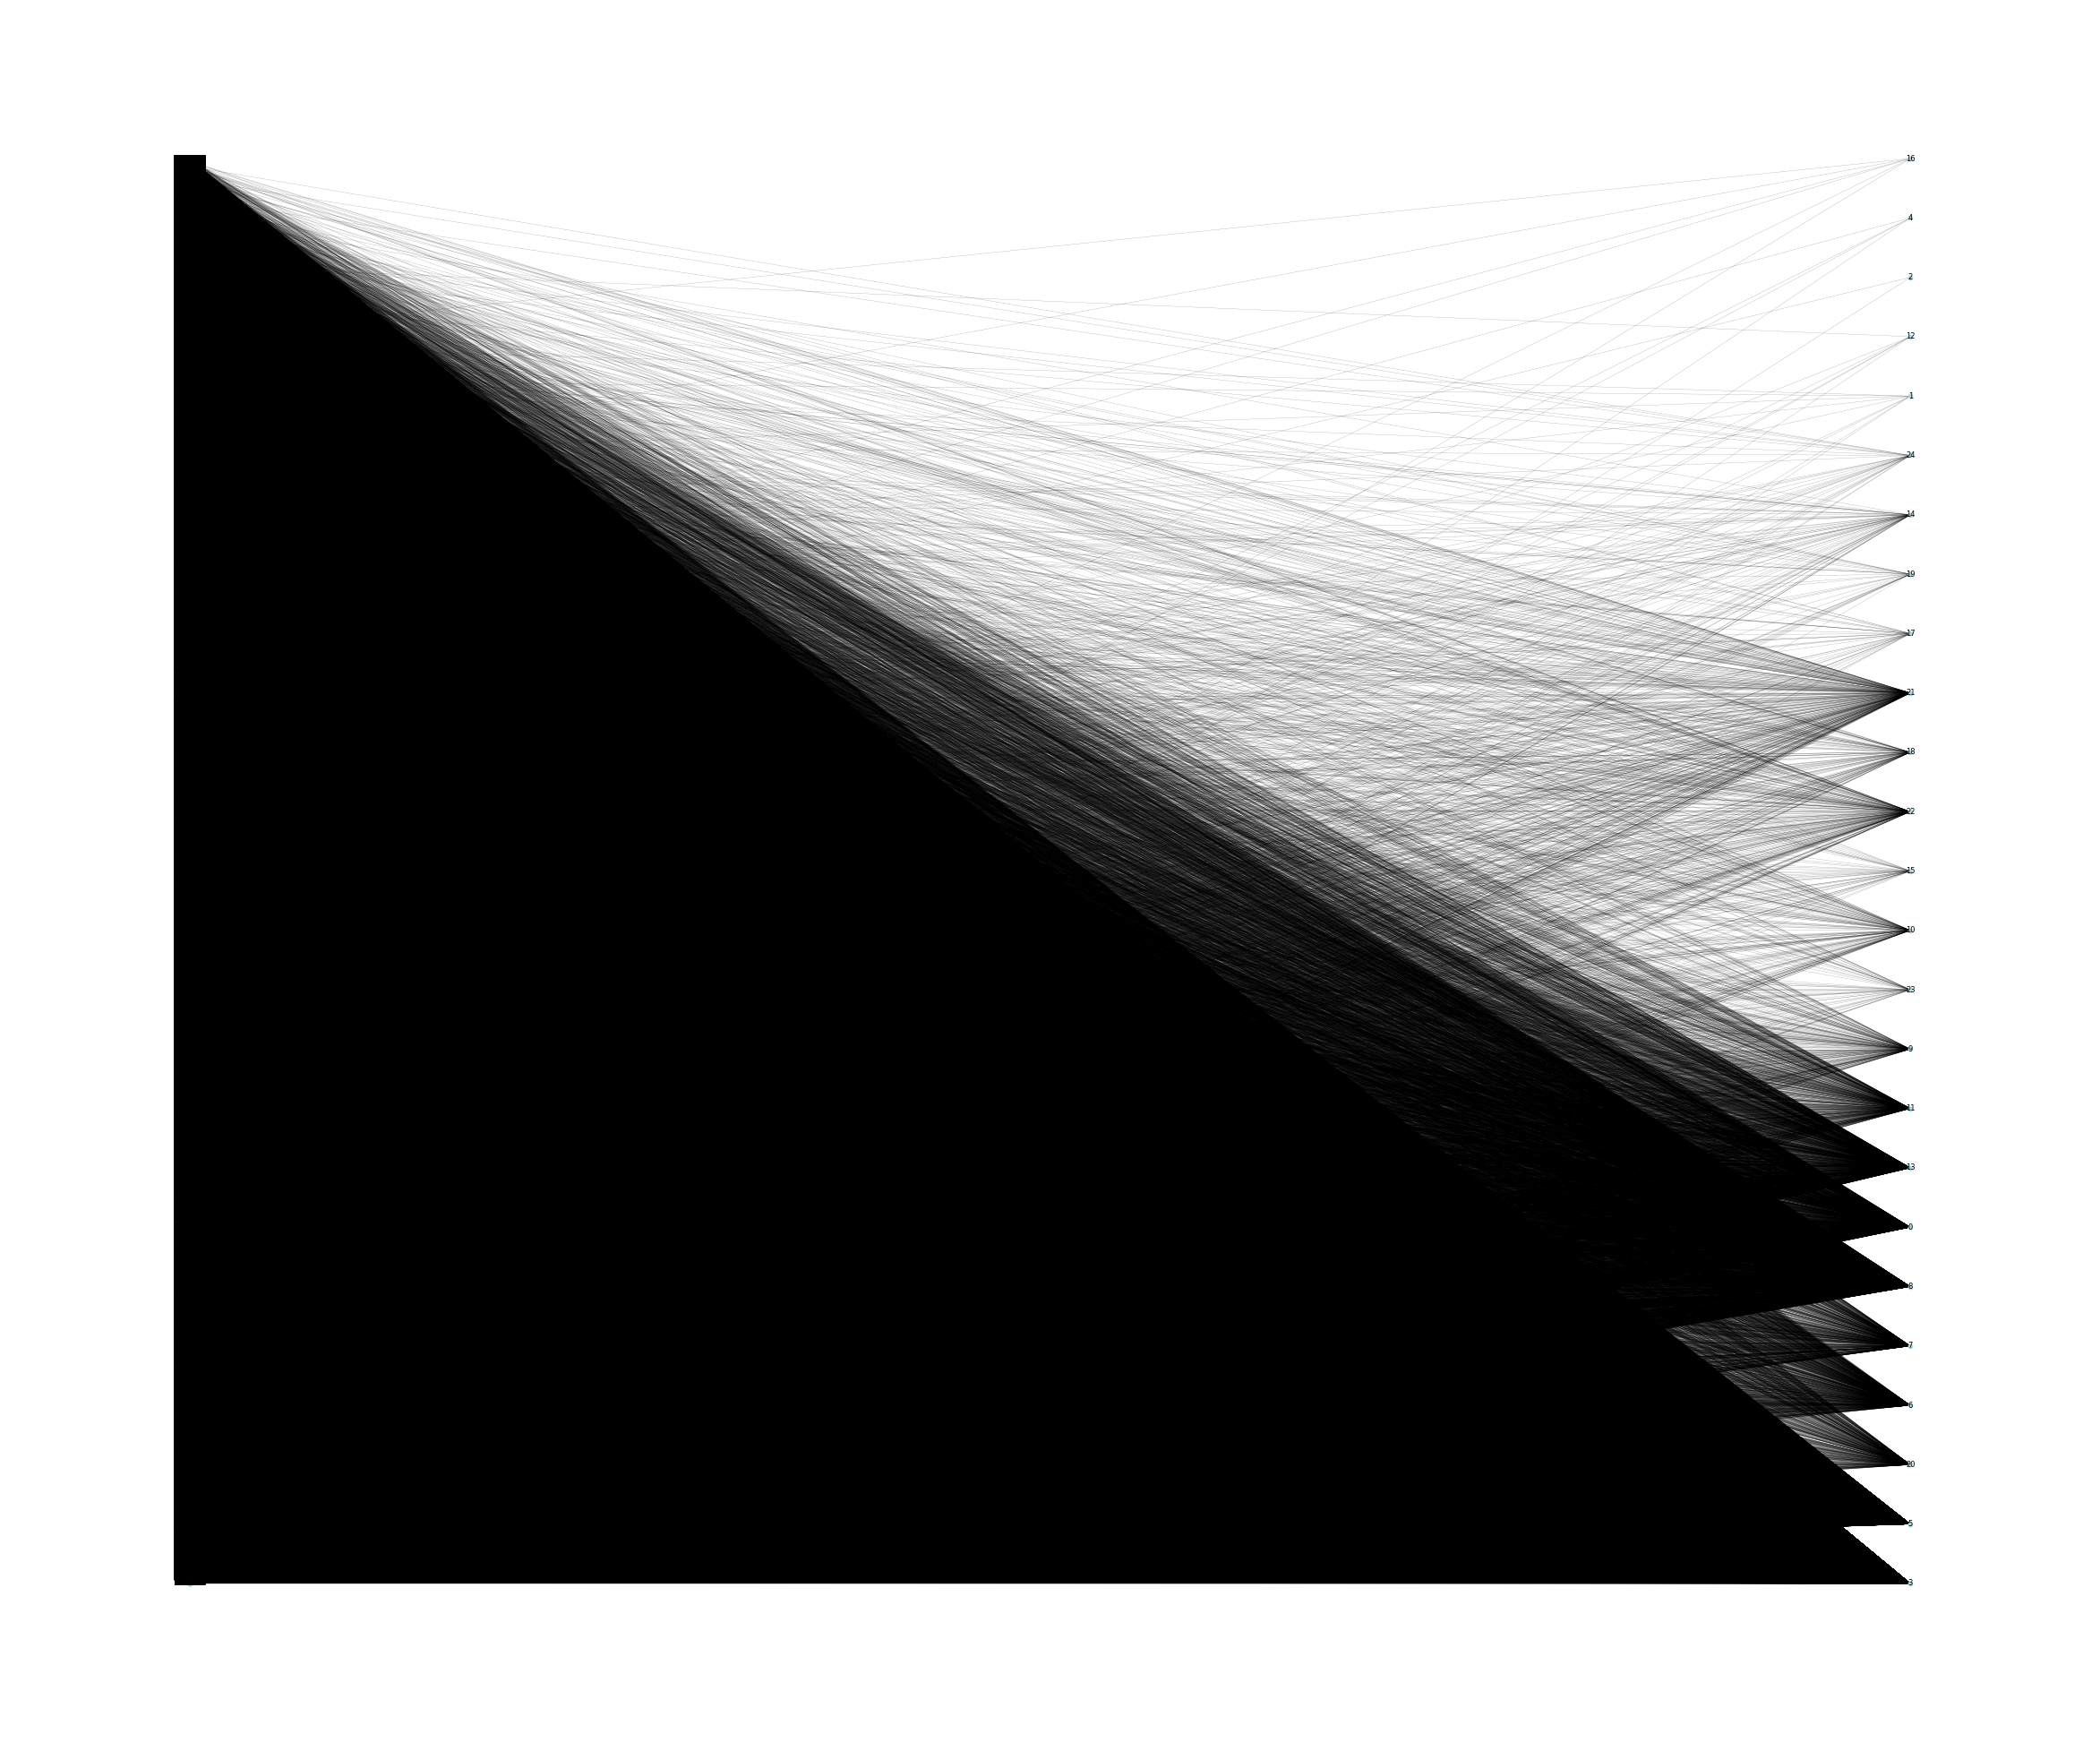

In [77]:
plt.figure(figsize=(30, 25))
pos = nx.bipartite_layout(G, nodes = user_nodes, )
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')
plt.axis('off')
plt.show()

In [78]:
print(df.service_id.unique())

[ 3 10  0  5 13 21  6 22 20 11 19  7 17 23 14 12 18 16 15  8  4  9  2 24
  1]


### Personalized PageRank

In [79]:
df['service_id'].value_counts()

3     11503962
5       851859
8       443799
0       224806
13      174677
6       113881
7        84543
11       64576
20       61256
21       27854
9        21460
22       20752
10       13368
18        9937
23        6495
14        5368
15        4628
17        4384
19        3209
24        2979
1          957
12         945
16         805
4          703
2          106
Name: service_id, dtype: int64

In [83]:
data['service_id'].value_counts()

3     115005
5       8578
8       4334
0       2201
13      1780
6       1174
7        846
11       663
20       651
21       295
22       214
9        213
10       136
18       105
14        60
23        52
15        46
17        36
24        29
19        28
1          9
12         6
16         6
4          4
2          2
Name: service_id, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
from networkx.algorithms import bipartite
from tqdm import tqdm
import matplotlib.pyplot as plt
import recmetrics

In [85]:
df, test = train_test_split(data, test_size=0.2, random_state=42)


edges = []
users = set()
services = set()
for index, row in df.iterrows():
    user, service = row["customer_id"] + 10000000000000000, row["service_id"] # чтобы не было пересечений в айдишниках сделаем шифт у юзеров
    edges.append((user, service, 1))
    users.add(user)
    services.add(service)
    

user_service_graph_df = nx.Graph()   
user_service_graph_df.add_nodes_from(list(users) + list(services))
user_service_graph_df.add_weighted_edges_from(edges)
service_service_graph_df = bipartite.weighted_projected_graph(user_service_graph_df, list(services), ratio=True)

In [86]:
class PersonalizedPageRankRecSys:
    def __init__(self, user_service_graph, service_service_graph, services):
        self.user_service_graph = user_service_graph
        self.service_service_graph = service_service_graph
        self.services = services
    
    def create_preference_vector(self, user_id):
        if user_id not in self.user_service_graph.nodes():
            return None
        
        edges = {m: w for _, m, w in self.user_service_graph.edges(user_id, data="weight")}
        total = sum(edges.values())
        if total > 0:
            return {service: edges.get(service, 0) / total for service in self.services}
        else:
            return {service: 1 for service in self.services}

    def recommend(self, user_id):
        p_vec = self.create_preference_vector(user_id + 10000000000000000)
        
        if p_vec is None:
            pr = nx.pagerank(self.service_service_graph)
        else:
            print(f"user: {user_id}\nvec:{p_vec}")
            pr = nx.pagerank(self.service_service_graph, personalization=p_vec)

        sorted_nodes = sorted(pr.items(), key=lambda x: x[1], reverse=True)

        if p_vec is None:
            recommended_nodes = [(node, score) for node, score in sorted_nodes]
        else:
            recommended_nodes = [(node, score) for node, score in sorted_nodes if node not in self.user_service_graph[user_id]]
            
        return recommended_nodes
    


def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.

    This function computes the average prescision at k between two lists of
    items.

    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The average precision at k over the input lists

    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.

    This function computes the mean average prescision at k between two lists
    of lists of items.

    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The mean average precision at k over the input lists

    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [87]:
recsys = PersonalizedPageRankRecSys(user_service_graph_df, service_service_graph_df, services)

In [95]:
users_services_test = dict()

for index, row in test.iterrows():
    user, service = row["customer_id"] + 10000000000000000, row["service_id"] # чтобы не было пересечений в айдишниках сделаем шифт у юзеров
    if user in users_services_test:
        users_services_test[user].append(service)
    else:
        users_services_test[user] = [service]

In [130]:
users_movies_pred = dict()
users_to_predict = (test['customer_id'].sample(15000) + 10000000000000000)

for user in tqdm(users_to_predict):
    users_movies_pred[user] = recsys.recommend(user)[:25]

100%|██████████| 15000/15000 [00:51<00:00, 290.09it/s]


In [131]:
MAP = []
MAR = []

for k in range(1, 25):
    y_true = []
    y_pred = []
    for user in users_to_predict:
        true = users_services_test[user]
        pred = [p[0] for p in users_movies_pred[user]][:k]

        y_true.append(true)
        y_pred.append(pred)

    MAR.append(recmetrics.mark(y_true, y_pred, k = k))
    MAP.append(mapk(y_true, y_pred, k = k))

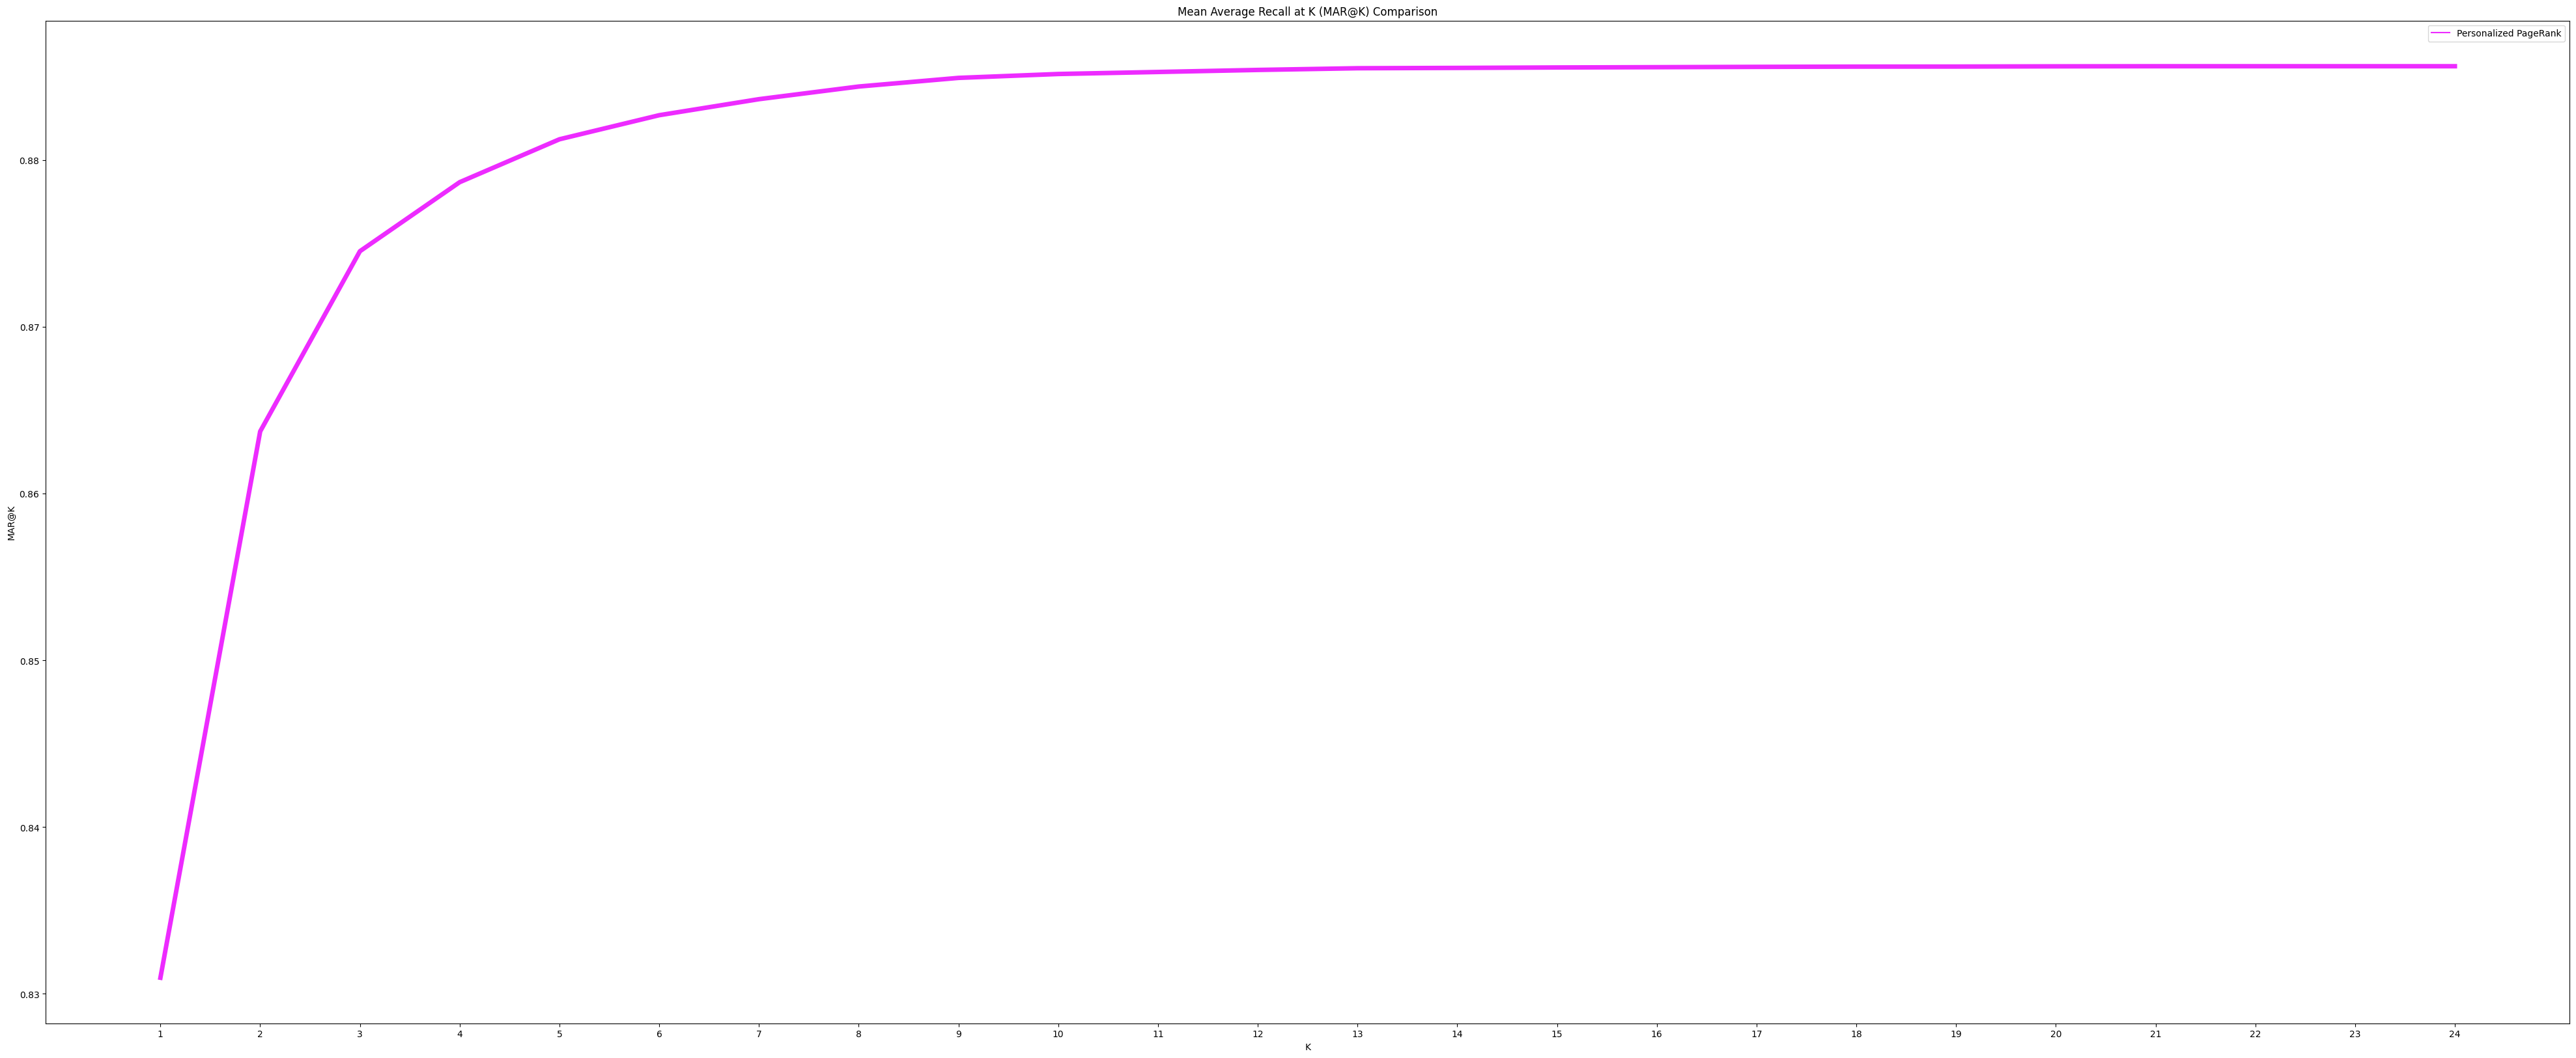

In [132]:
plt.figure(figsize=(50, 20))
recmetrics.mark_plot([MAR], ["Personalized PageRank"], range(1, 25))

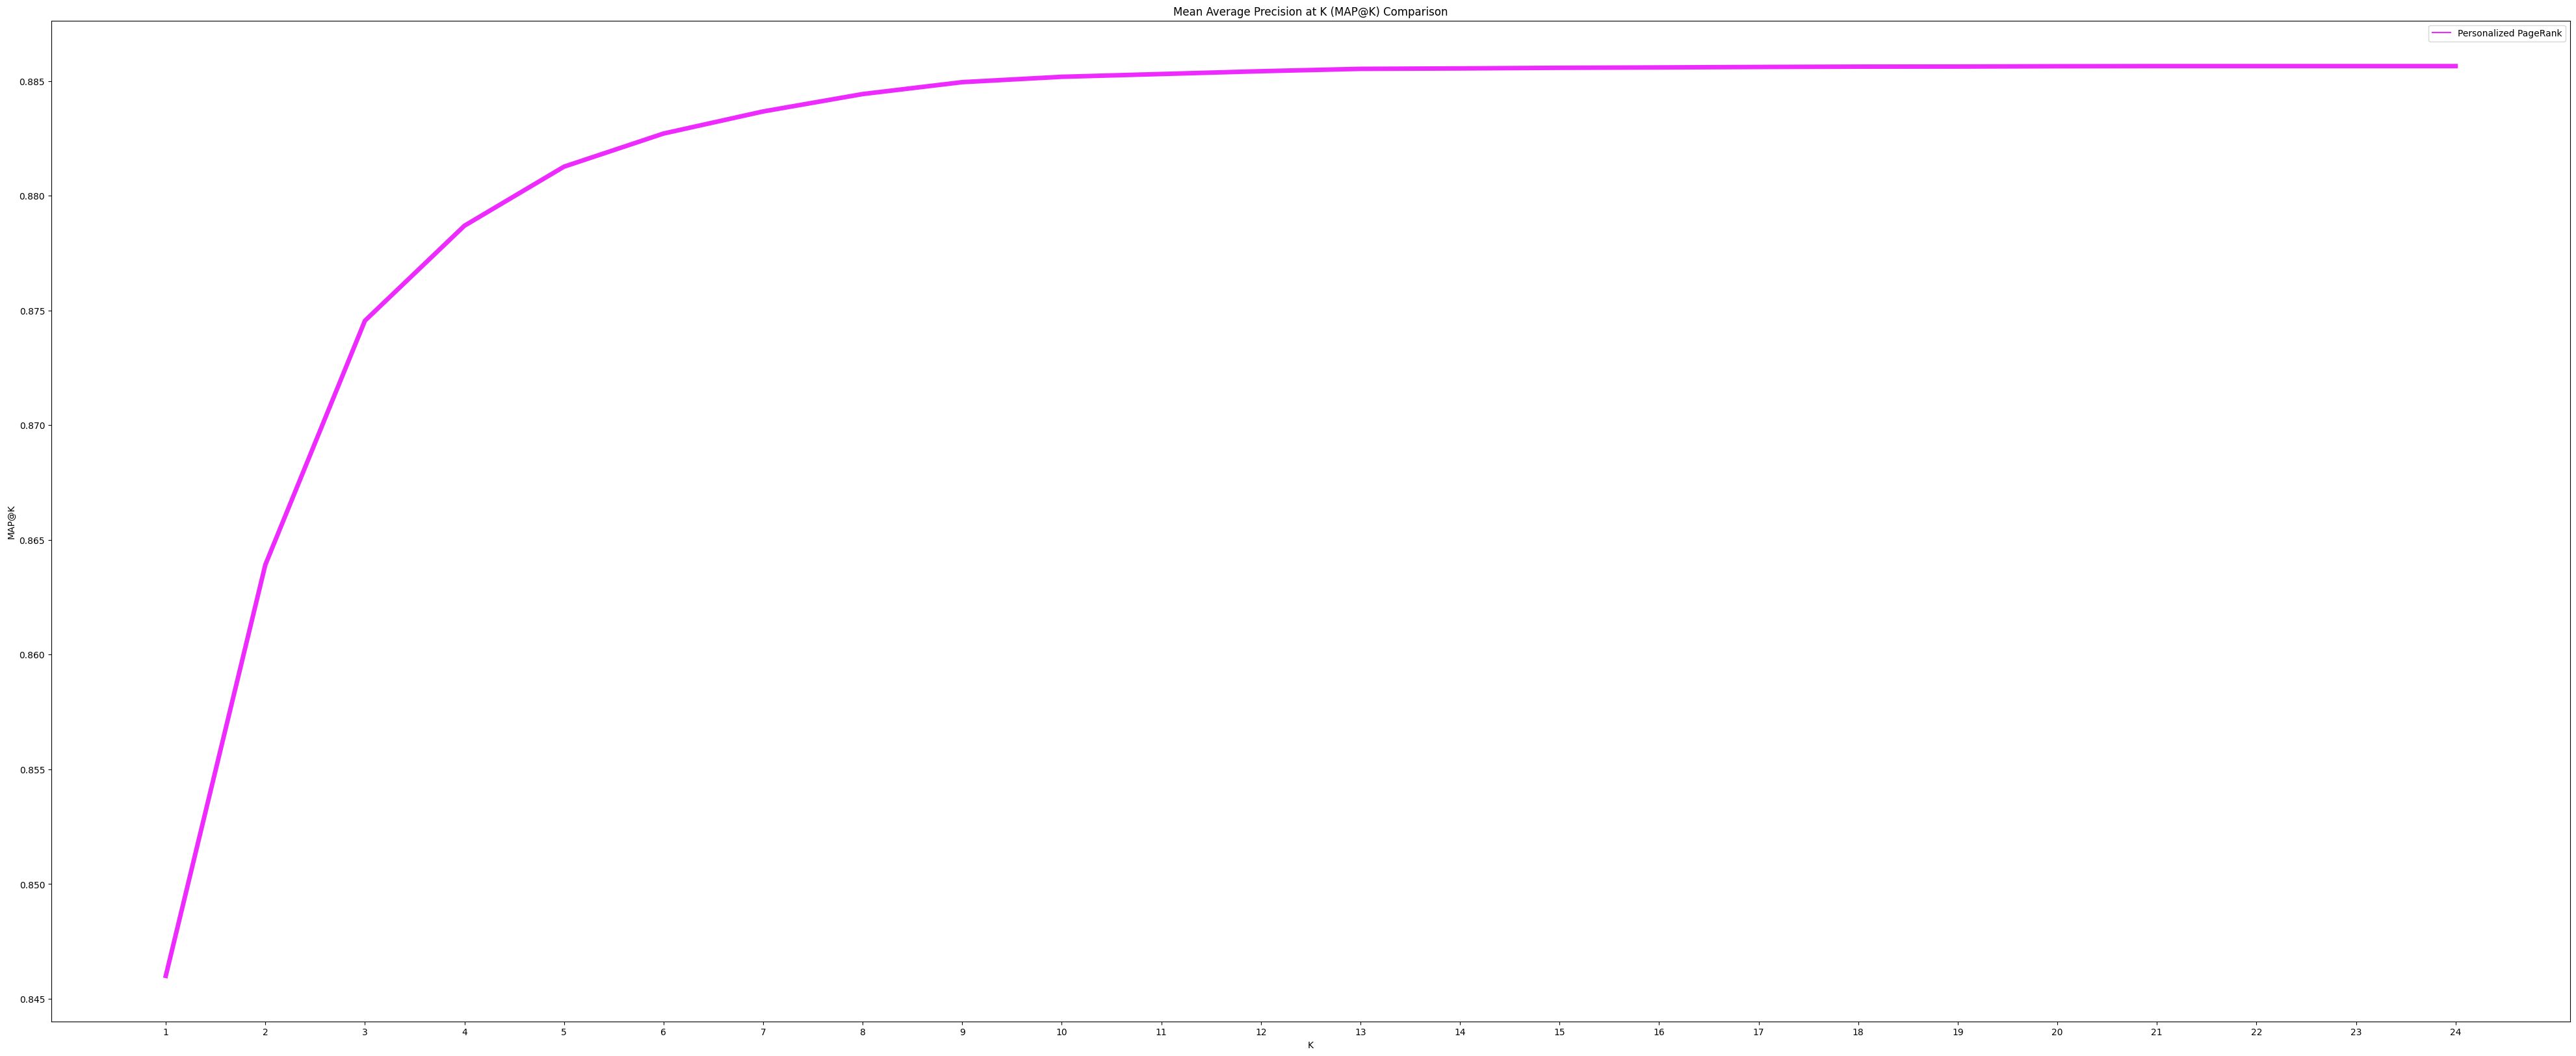

In [133]:
plt.figure(figsize=(50, 20))
recmetrics.mapk_plot([MAP], ["Personalized PageRank"], range(1, 25))